In [2]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import psycopg2

In [3]:
#Conectando com o banco de dados no PostgreSQL
con = psycopg2.connect(dbname='TCC', user='postgres', port='5433', password='paulista98')

In [4]:
#Criando tabela no banco
cursor = con.cursor()
sql = '''CREATE TABLE IF NOT EXISTS base_preventiva(
	UDI INT PRIMARY KEY,
	Product_ID CHAR(7),
	Type_ CHAR(1),
	Air_temperature NUMERIC(4,1),
	Process_temperature NUMERIC(4,1),
	Rotational_speed NUMERIC(5,1),
	Torque NUMERIC(3,1),
	Tool_wear INT,
	Target BOOLEAN,
	Failure_type TEXT);'''
cursor.execute(sql)

In [5]:
#Alimentando o banco com o arquivo csv
#sql = '''COPY base_preventiva(
	#UDI, Product_ID, type_, Air_temperature, Process_temperature,
	#Rotational_speed, Torque, tool_wear, target, failure_type)
	#FROM 'C:\\Users\\HIGOR-PC\\OneDrive\\TCC\\TCC\\Code\\base\\predictive_maintenance.csv'
	#DELIMITER ','
	#CSV HEADER;'''
#cursor.execute(sql)
con.commit()


In [6]:
# Extraindo dados do banco e transformando em dataframe
df=pd.read_sql('''SELECT * FROM base_preventiva''', con=con)
con.close()
df.head(15)

C:\Users\HIGOR-PC\AppData\Local\Temp\ipykernel_5984\1746826091.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql('''SELECT * FROM base_preventiva''', con=con)


,udi,product_id,type_,air_temperature,process_temperature,rotational_speed,torque,tool_wear,target,failure_type
0,1,M14860,M,298.1,308.6,1551.0,42.8,0,False,No Failure
1,2,L47181,L,298.2,308.7,1408.0,46.3,3,False,No Failure
2,3,L47182,L,298.1,308.5,1498.0,49.4,5,False,No Failure
3,4,L47183,L,298.2,308.6,1433.0,39.5,7,False,No Failure
4,5,L47184,L,298.2,308.7,1408.0,40.0,9,False,No Failure
5,6,M14865,M,298.1,308.6,1425.0,41.9,11,False,No Failure
6,7,L47186,L,298.1,308.6,1558.0,42.4,14,False,No Failure
7,8,L47187,L,298.1,308.6,1527.0,40.2,16,False,No Failure
8,9,M14868,M,298.3,308.7,1667.0,28.6,18,False,No Failure
9,10,M14869,M,298.5,309.0,1741.0,28.0,21,False,No Failure


In [7]:
# Analise Descritiva
# Aqui vemos as principais caracteristicas estatisticas das variaveis numéricas, como contagem, percentis, media e desvio padrão
medias = df.describe()
medias

,udi,air_temperature,process_temperature,rotational_speed,torque,tool_wear
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000


In [8]:
# Calculo do coeficiente de variação (Desvio padrão / média). Esse valor indica em porcentagem, o quanto determinado conjunto de dados possui de variabilidade.
df_num = df.drop(columns=['udi','product_id','type_','target',"failure_type" ])
me=(df_num.std()/df_num.mean())*100
me

air_temperature         0.666742
process_temperature     0.478615
rotational_speed       11.651084
torque                 24.930493
tool_wear              58.965778
dtype: float64

In [9]:
#Realizando check de missing data

miss = df.isnull().sum()
miss

udi                    0
product_id             0
type_                  0
air_temperature        0
process_temperature    0
rotational_speed       0
torque                 0
tool_wear              0
target                 0
failure_type           0
dtype: int64

Descrição das variáveis:

10.000 observações, sem nenhum missing (dados faltantes).

VARIÁVEIS INDEPENDENTES
UDI: Chave unica de identificação da cada conjunto de dados. Uma indexação.
Product ID: Variável categórica que consiste em uma chave única que representa o serial de cada produto.
Type: Variável categórica que representa o nivel de qualidade do produto. L (low), M (medium) e H (high);
Air Temperature: Variável numérica de temperatura do ar na produção, medida em Kelvin;
Process Temperature: Variável numérica de temperatura do processo na produção, medida em Kelvin;
Rotational Speed: Variável numérica da velocidade de rotação do equipamento, medido em rpm;
Torque: Variável numérica do torque do equipamento, medido em Nm;
Tool Wear: Variável númerica do tempo de utilização da ferramenta de corte até a sua quebra e susbtitução, medida em minutos.

VARIÁVEIS DEPENDENTES
Target: Variável categorica do tipo binária, onde 0 indica não-falha e 1 indica falha do equipamento;
Failure Type: Variável categórica que nos momentos de falha, indica qual foi o tipo de falha ocorrida no equipamento.

<Axes: >

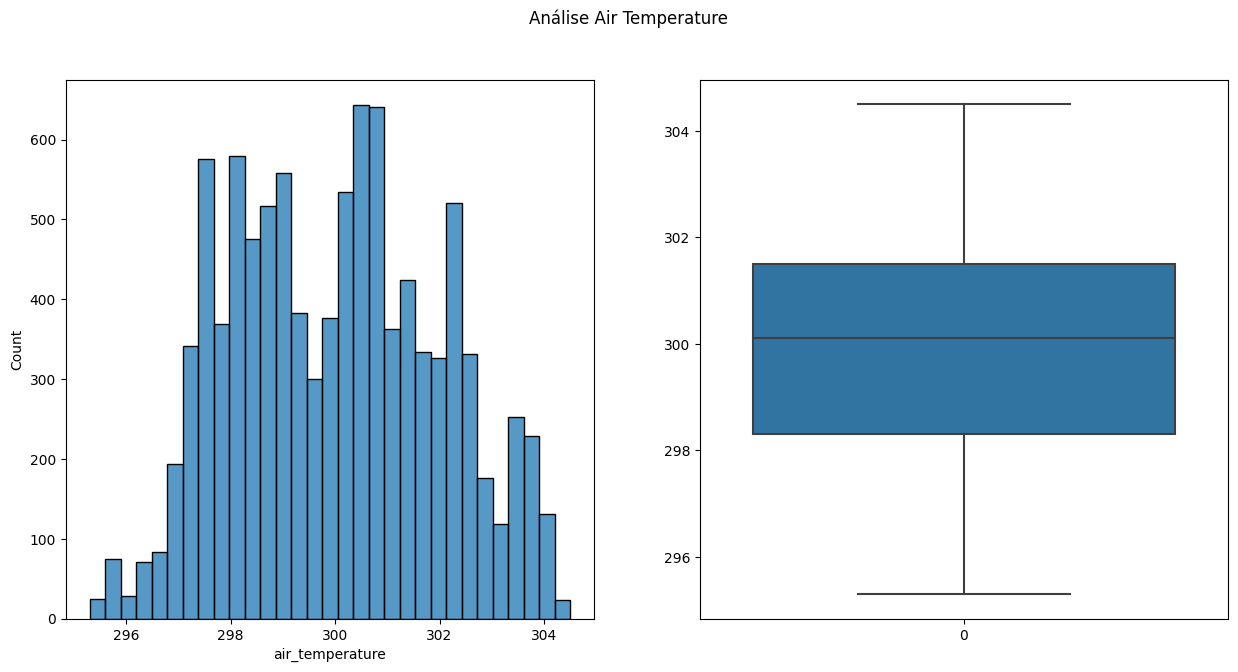

In [10]:
# Análise AIR TEMPERATURE (Hist e boxplot)

fig, axes = plt.subplots(1, 2, figsize = (15, 7))
fig.suptitle('Análise Air Temperature')

sns.histplot(ax = axes[0] ,data = df['air_temperature'])
sns.boxplot(ax = axes[1] ,data = df['air_temperature'])

Fitting 111 distributions:   0%|          | 0/111 [00:00<?, ?it/s]

2024-03-14 20:59:39.048 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-03-14 20:59:39.246 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.507524)
Fitting 111 distributions:   2%|▏         | 2/111 [00:00<00:12,  8.88it/s]2024-03-14 20:59:39.314 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.301348)
2024-03-14 20:59:39.457 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cosine distribution with error=0.315344)
Fitting 111 distributions:   5%|▌         | 6/111 [00:00<00:19,  5.49it/s]2024-03-14 20:59:40.047 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted dweibull distribution with error=0.283827)
2024-03-14 20:59:40.056 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=1.03411)
Fitting 111 distributions:   7%|▋         | 8/111 [00:01<00:12, 

           sumsquare_error         aic         bic  kl_div  ks_statistic  \
dweibull          0.283827  512.638611  534.269632     inf      0.056492   
gennorm           0.294332  503.593160  525.224181     inf      0.048604   
johnsonsb         0.297434  500.605915  529.447277     inf      0.043062   
dgamma            0.300482  517.021765  538.652786     inf      0.058411   
anglit            0.301348  487.250640  501.671320     inf      0.044630   

              ks_pvalue  
dweibull   3.516311e-28  
gennorm    5.722421e-21  
johnsonsb  1.498428e-16  
dgamma     4.239026e-30  
anglit     9.549874e-18  


c:\Users\HIGOR-PC\OneDrive\TCC\TCC\Code\.venv\Lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\HIGOR-PC\OneDrive\TCC\TCC\Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


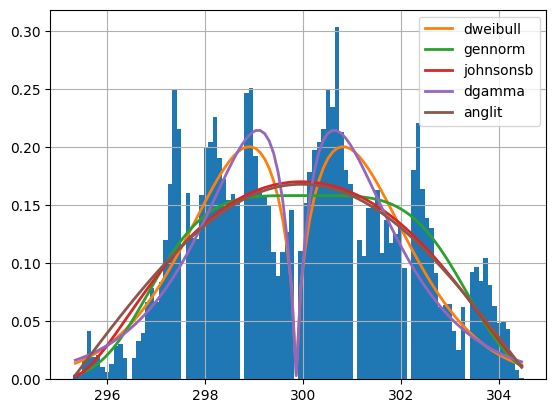

In [29]:
from fitter import Fitter, get_common_distributions

data = df['air_temperature']
f1 = Fitter(data)
f1.fit(get_common_distributions())
f1.get_best(method = 'sumsquare_error')

In [30]:
f1.get_best(method = 'sumsquare_error')

{'dweibull': {'c': 1.5448645242048045,
  'loc': 299.85350330009123,
  'scale': 1.875306072466103}}

<Axes: >

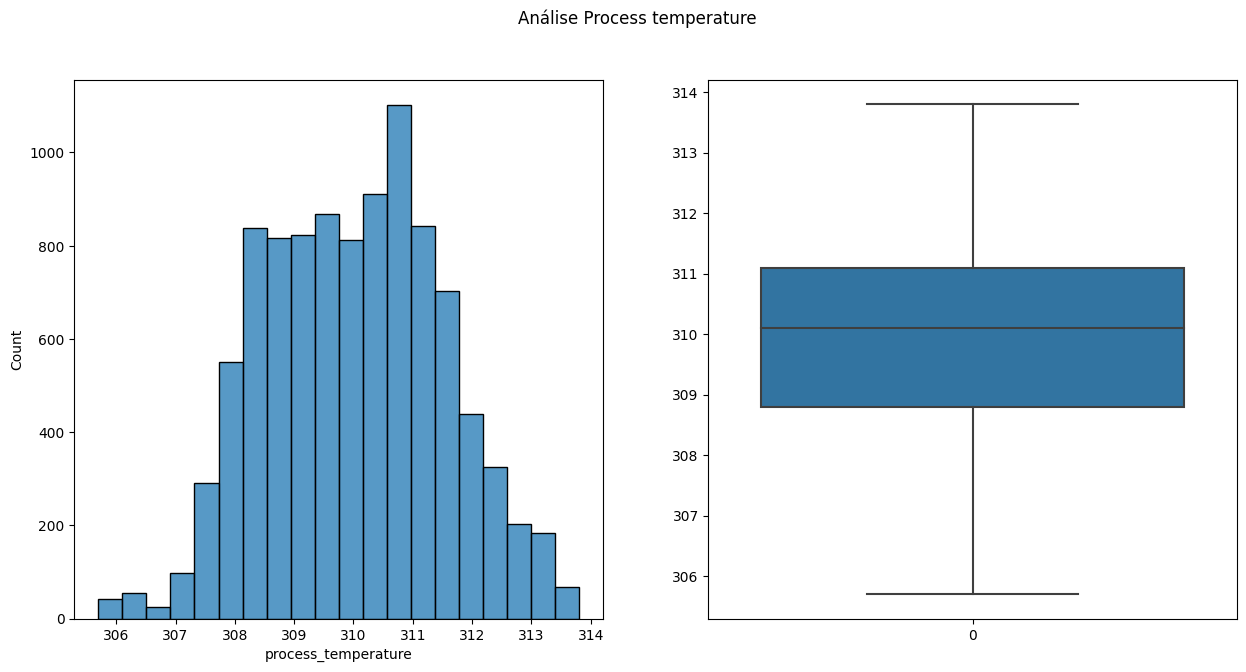

In [12]:
# Análise PROCESS TEMPERATURE (Hist e boxplot)

fig, axes = plt.subplots(1, 2, figsize = (15, 7))
fig.suptitle('Análise Process temperature')

sns.histplot(ax = axes[0] ,data = df['process_temperature'], bins = 20)
sns.boxplot(ax = axes[1] ,data = df['process_temperature'])

Fitting 111 distributions:   4%|▎         | 4/111 [00:23<11:27,  6.43s/it]2024-03-14 21:06:41.533 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED alpha distribution (taking more than 30 seconds)
2024-03-14 21:06:41.594 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED argus distribution (taking more than 30 seconds)
Fitting 111 distributions:   5%|▌         | 6/111 [00:30<08:00,  4.57s/it]2024-03-14 21:06:41.596 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED betaprime distribution (taking more than 30 seconds)
2024-03-14 21:06:41.626 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-14 21:06:41.657 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED arcsine distribution (taking more than 30 seconds)
Fitting 111 distributions:   8%|▊         | 9/111 [00:31<03:01,  1.78s/it]2024-03-14 21:06:41.735 | WARNING  | fitter.fitter:_fit_single_distribution:34

           sumsquare_error         aic         bic  kl_div  ks_statistic  \
dweibull          0.622476  525.723482  547.354503     inf      0.039362   
gennorm           0.639269  531.809001  553.440022     inf      0.032261   
cosine            0.656817  518.482178  532.902859     inf      0.043129   
norm              0.678922  518.014200  532.434881     inf      0.049159   
exponnorm         0.678923  520.015566  541.646587     inf      0.049159   

              ks_pvalue  
dweibull   6.729639e-14  
gennorm    1.777418e-09  
cosine     1.334463e-16  
norm       1.929198e-21  
exponnorm  1.931907e-21  


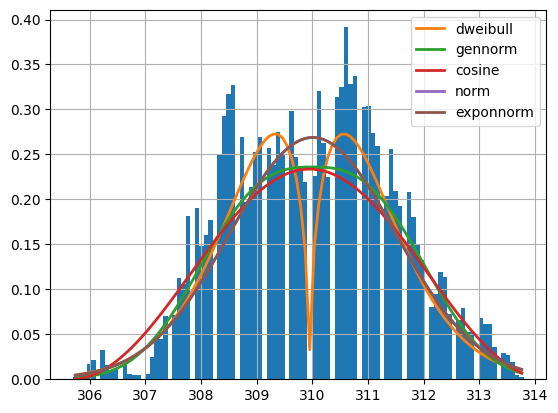

In [31]:
data = df['process_temperature']
f2 = Fitter(data)
f2.fit(get_common_distributions())
print(f2.summary())

In [32]:
f2.get_best(method = 'sumsquare_error')

{'dweibull': {'c': 1.4605679679784216,
  'loc': 309.9493826231152,
  'scale': 1.356613710933162}}

In [13]:
#Analisando frequências Type
freq_type = pd.DataFrame({'Frequência' : df['type_'].value_counts(), 'Porcentagem(%)' : df['type_'].value_counts(normalize = True)*100})
freq_type

,Frequência,Porcentagem(%)
type_,,
L,6000,60.00
M,2997,29.97
H,1003,10.03


<Axes: >

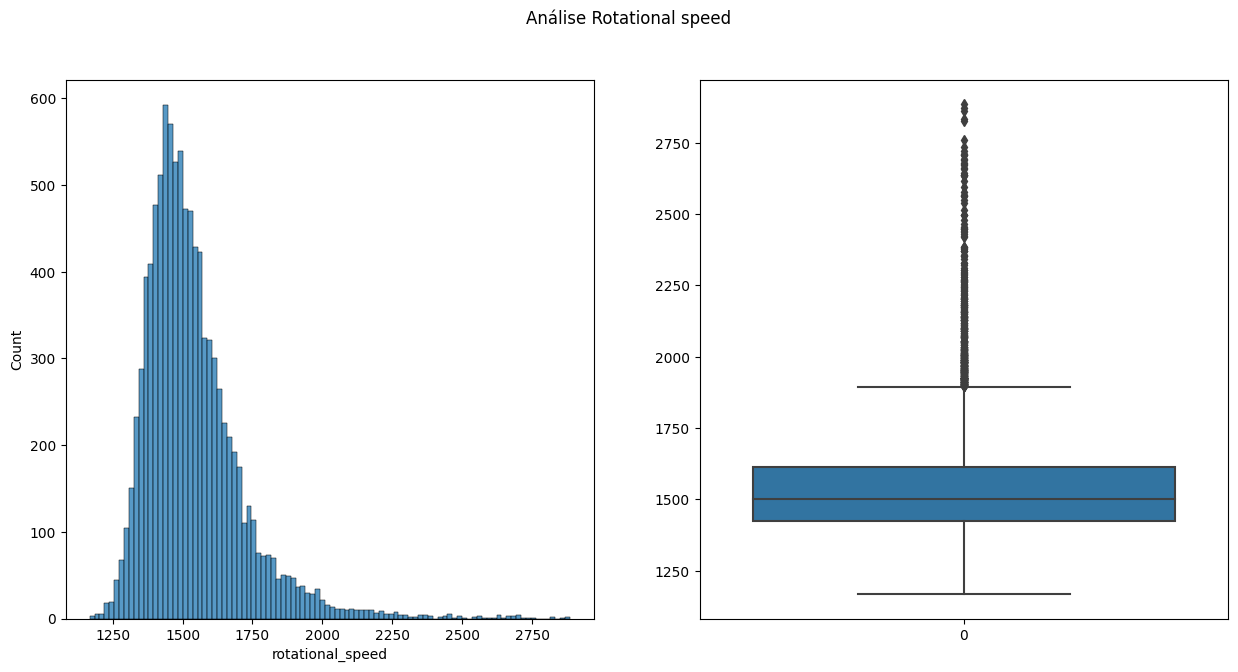

In [14]:
# Análise ROTATIONAL SPEED (Hist e boxplot)

fig, axes = plt.subplots(1, 2, figsize = (15, 7))
fig.suptitle('Análise Rotational speed')

sns.histplot(ax = axes[0] ,data = df['rotational_speed'])
sns.boxplot(ax = axes[1] ,data = df['rotational_speed'])

Fitting 111 distributions:   3%|▎         | 3/111 [00:31<18:12, 10.11s/it]2024-03-14 21:15:22.191 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED betaprime distribution (taking more than 30 seconds)
2024-03-14 21:15:22.207 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED argus distribution (taking more than 30 seconds)
Fitting 111 distributions:   5%|▍         | 5/111 [00:32<07:15,  4.11s/it]2024-03-14 21:15:22.208 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED anglit distribution (taking more than 30 seconds)
2024-03-14 21:15:22.208 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED arcsine distribution (taking more than 30 seconds)
Fitting 111 distributions:  11%|█         | 12/111 [00:33<00:58,  1.71it/s]2024-03-14 21:15:22.409 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr12 distribution (taking more than 30 seconds)
2024-03-14 21:15:24.277 | INFO     | fitter.fitter:_fit_single_distributio

          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gumbel_r     8.669622e-07  2021.577058  2035.997738     inf      0.022133   
lognorm      1.116710e-06  1986.075658  2007.706679     inf      0.023131   
logistic     6.716880e-06  2230.180805  2244.601486     inf      0.063875   
laplace      7.959513e-06  2054.690247  2069.110928     inf      0.079159   
cauchy       9.230815e-06  1792.510031  1806.930712     inf      0.108830   

              ks_pvalue  
gumbel_r   1.094907e-04  
lognorm    4.430320e-05  
logistic   6.491449e-36  
laplace    5.977680e-55  
cauchy    1.328512e-103  


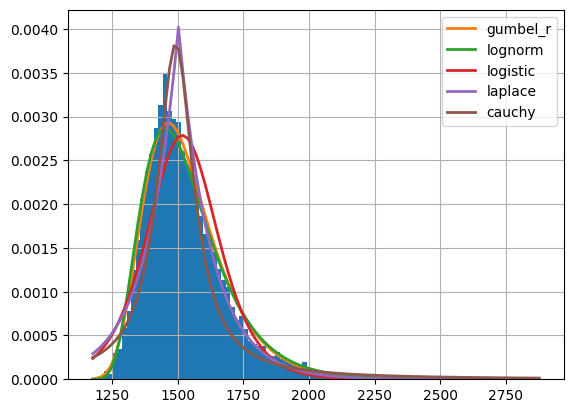

In [33]:
data = df['rotational_speed']
f3 = Fitter(data)
f3.fit(get_common_distributions())
print(f3.summary())

In [34]:
f3.get_best(method = 'sumsquare_error')

{'gumbel_r': {'loc': 1463.7640757796837, 'scale': 125.57935675701474}}

<Axes: >

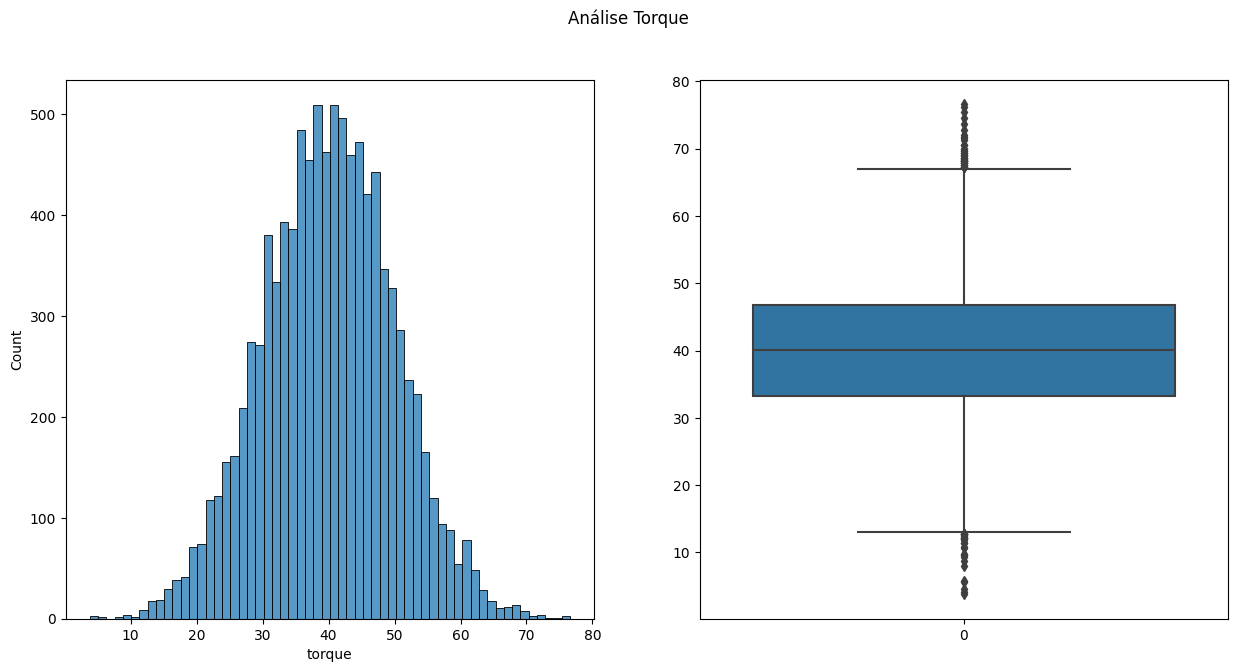

In [15]:
# Análise TORQUE (Hist e boxplot)

fig, axes = plt.subplots(1, 2, figsize = (15, 7))
fig.suptitle('Análise Torque')

sns.histplot(ax = axes[0] ,data = df['torque'])
sns.boxplot(ax = axes[1] ,data = df['torque'])

Fitting 111 distributions:   2%|▏         | 2/111 [00:32<34:13, 18.84s/it]2024-03-14 21:27:43.684 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED alpha distribution (taking more than 30 seconds)
2024-03-14 21:27:43.758 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
Fitting 111 distributions:   5%|▍         | 5/111 [00:33<07:29,  4.24s/it]2024-03-14 21:27:43.989 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-03-14 21:27:44.021 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED betaprime distribution (taking more than 30 seconds)
Fitting 111 distributions:   8%|▊         | 9/111 [00:35<01:57,  1.15s/it]2024-03-14 21:27:44.199 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr12 distribution (taking more than 30 seconds)
2024-03-14 21:27:44.321 | WARNING  | fitter.fitter:_fit_single_distribution:347 

          sumsquare_error          aic          bic  kl_div  ks_statistic  \
norm             0.000395  1092.128406  1106.549087     inf      0.009038   
lognorm          0.000395  1094.127444  1115.758465     inf      0.009045   
logistic         0.000683  1041.821861  1056.242542     inf      0.020221   
gumbel_l         0.002134  1214.392586  1228.813267     inf      0.059498   
gumbel_r         0.002554  1196.750761  1211.171442     inf      0.065706   

             ks_pvalue  
norm      3.852000e-01  
lognorm   3.842571e-01  
logistic  5.537380e-04  
gumbel_l  3.254494e-31  
gumbel_r  5.591491e-38  


c:\Users\HIGOR-PC\OneDrive\TCC\TCC\Code\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


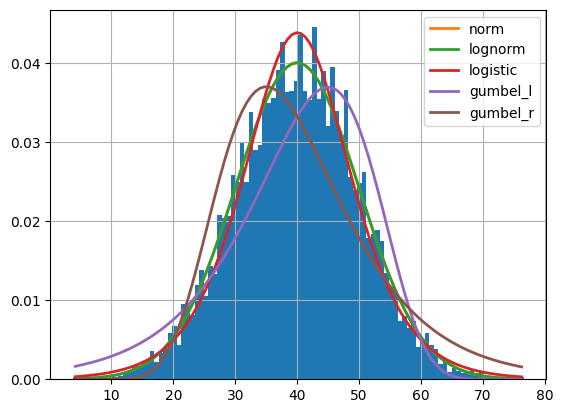

In [35]:
data = df['torque']
f4 = Fitter(data)
f4.fit(get_common_distributions())
print(f4.summary())

In [36]:
f4.get_best(method = 'sumsquare_error')

{'norm': {'loc': 39.986909999999995, 'scale': 9.96843526597329}}

<Axes: >

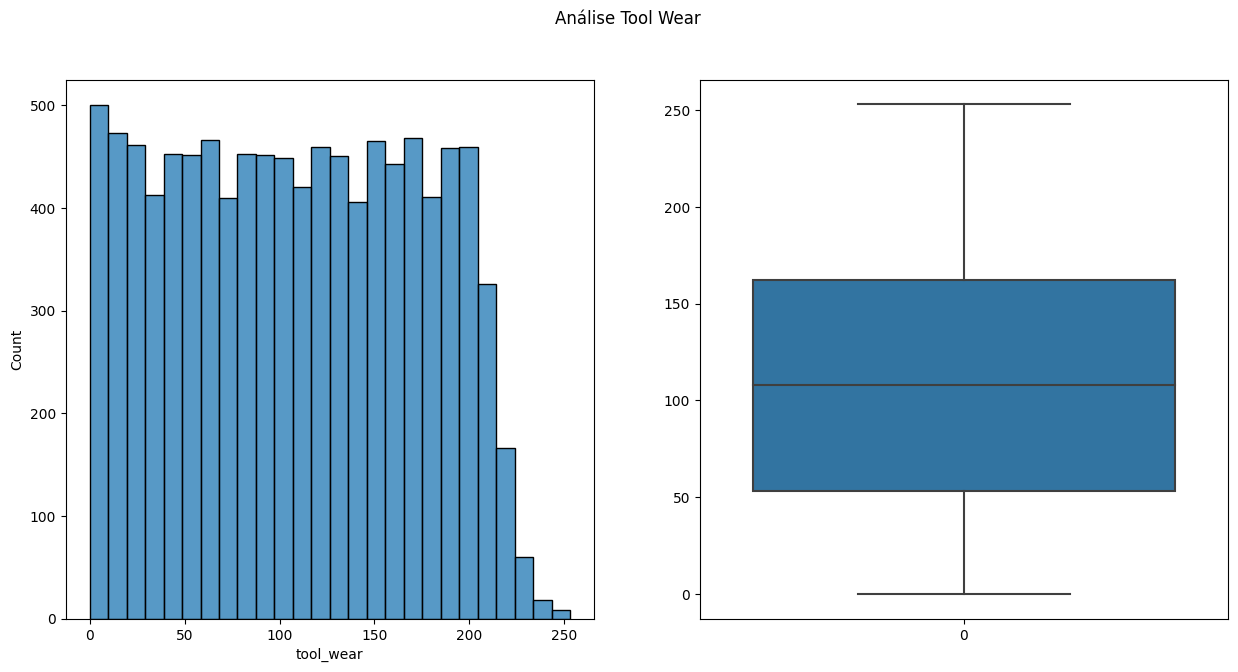

In [16]:
# Análise TOOL WEAR (Hist e boxplot)

fig, axes = plt.subplots(1, 2, figsize = (15, 7))
fig.suptitle('Análise Tool Wear')

sns.histplot(ax = axes[0] ,data = df['tool_wear'])
sns.boxplot(ax = axes[1] ,data = df['tool_wear'])

Fitting 111 distributions:   1%|          | 1/111 [00:02<04:53,  2.67s/it]2024-03-14 21:41:26.733 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED anglit distribution (taking more than 30 seconds)
2024-03-14 21:41:26.755 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED arcsine distribution (taking more than 30 seconds)
Fitting 111 distributions:   4%|▎         | 4/111 [00:33<11:26,  6.42s/it]2024-03-14 21:41:26.875 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED argus distribution (taking more than 30 seconds)
2024-03-14 21:41:27.107 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED betaprime distribution (taking more than 30 seconds)
Fitting 111 distributions:   5%|▌         | 6/111 [00:34<05:06,  2.92s/it]2024-03-14 21:41:27.262 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr12 distribution (taking more than 30 seconds)
2024-03-14 21:41:27.262 | WARNING  | fitter.fitter:_fit_single_distribution

          sumsquare_error          aic          bic  kl_div  ks_statistic  \
rayleigh         0.000274  1149.633133  1164.053814     inf      0.069758   
uniform          0.000290  1110.677898  1125.098578     inf      0.135876   
norm             0.000296  1158.608626  1173.029307     inf      0.060069   
gumbel_l         0.000315  1180.160517  1194.581198     inf      0.086783   
gumbel_r         0.000326  1158.314771  1172.735452     inf      0.076121   

              ks_pvalue  
rayleigh   9.311683e-43  
uniform   1.735608e-161  
norm       8.274129e-32  
gumbel_l   5.632216e-66  
gumbel_r   7.689146e-51  


c:\Users\HIGOR-PC\OneDrive\TCC\TCC\Code\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\HIGOR-PC\OneDrive\TCC\TCC\Code\.venv\Lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\HIGOR-PC\OneDrive\TCC\TCC\Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


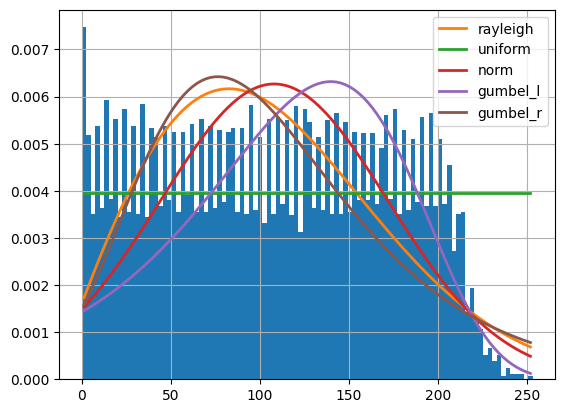

In [37]:
data = df['tool_wear']
f5 = Fitter(data)
f5.fit(get_common_distributions())
print(f5.summary())

In [38]:
f5.get_best(method = 'sumsquare_error')

{'rayleigh': {'loc': -15.752486398685495, 'scale': 98.3717381827468}}

In [17]:
#Analisando frequências Target, onde False indica não-falha e True significa equipamento em falha.

freq_target = pd.DataFrame({'Frequência' : df['target'].value_counts(), 'Porcentagem(%)' : df['target'].value_counts(normalize = True)*100})
freq_target

,Frequência,Porcentagem(%)
target,,
False,9661,96.61
True,339,3.39


In [18]:
# Recorte do conjunto de dados para as observações de falha do equipamento
falhas = df[df['failure_type']!='No Failure']
falhas

,udi,product_id,type_,air_temperature,process_temperature,rotational_speed,torque,tool_wear,target,failure_type
50,51,L47230,L,298.9,309.1,2861.0,4.6,143,True,Power Failure
69,70,L47249,L,298.9,309.0,1410.0,65.7,191,True,Power Failure
77,78,L47257,L,298.8,308.9,1455.0,41.3,208,True,Tool Wear Failure
160,161,L47340,L,298.4,308.2,1282.0,60.7,216,True,Overstrain Failure
161,162,L47341,L,298.3,308.1,1412.0,52.3,218,True,Overstrain Failure
...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271.0,16.2,218,True,Tool Wear Failure
9764,9765,L56944,L,298.5,309.5,1294.0,66.7,12,True,Power Failure
9822,9823,L57002,L,298.5,309.4,1360.0,60.9,187,True,Overstrain Failure
9830,9831,L57010,L,298.3,309.3,1337.0,56.1,206,True,Overstrain Failure


In [19]:
#Analisando frequências Failure Type

freq_failure = pd.DataFrame({'Frequência' : falhas['failure_type'].value_counts(), 'Porcentagem(%)' : falhas['failure_type'].value_counts(normalize = True)*100})
freq_failure

,Frequência,Porcentagem(%)
failure_type,,
Heat Dissipation Failure,112,32.183908
Power Failure,95,27.298851
Overstrain Failure,78,22.413793
Tool Wear Failure,45,12.931034
Random Failures,18,5.172414


In [20]:
(df[df['failure_type']!='No Failure']).value_counts()

udi   product_id  type_  air_temperature  process_temperature  rotational_speed  torque  tool_wear  target  failure_type            
51    L47230      L      298.9            309.1                2861.0            4.6     143        True    Power Failure               1
4841  L52020      L      303.4            311.9                1298.0            63.9    59         True    Heat Dissipation Failure    1
4998  M19857      M      303.6            312.8                2659.0            11.4    26         True    Power Failure               1
4989  L52168      L      303.8            313.1                2497.0            13.0    5          True    Power Failure               1
4985  L52164      L      303.8            313.1                1256.0            58.7    213        True    Overstrain Failure          1
                                                                                                                                       ..
4082  L51261      L      302.0         

In [21]:
# Correlação entre as variáveis

correl = df.drop(columns=['udi','product_id','type_',"failure_type" ]).corr()
correl

,air_temperature,process_temperature,rotational_speed,torque,tool_wear,target
air_temperature,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
process_temperature,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
rotational_speed,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
torque,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
tool_wear,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
target,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


<Axes: xlabel='air_temperature', ylabel='tool_wear'>

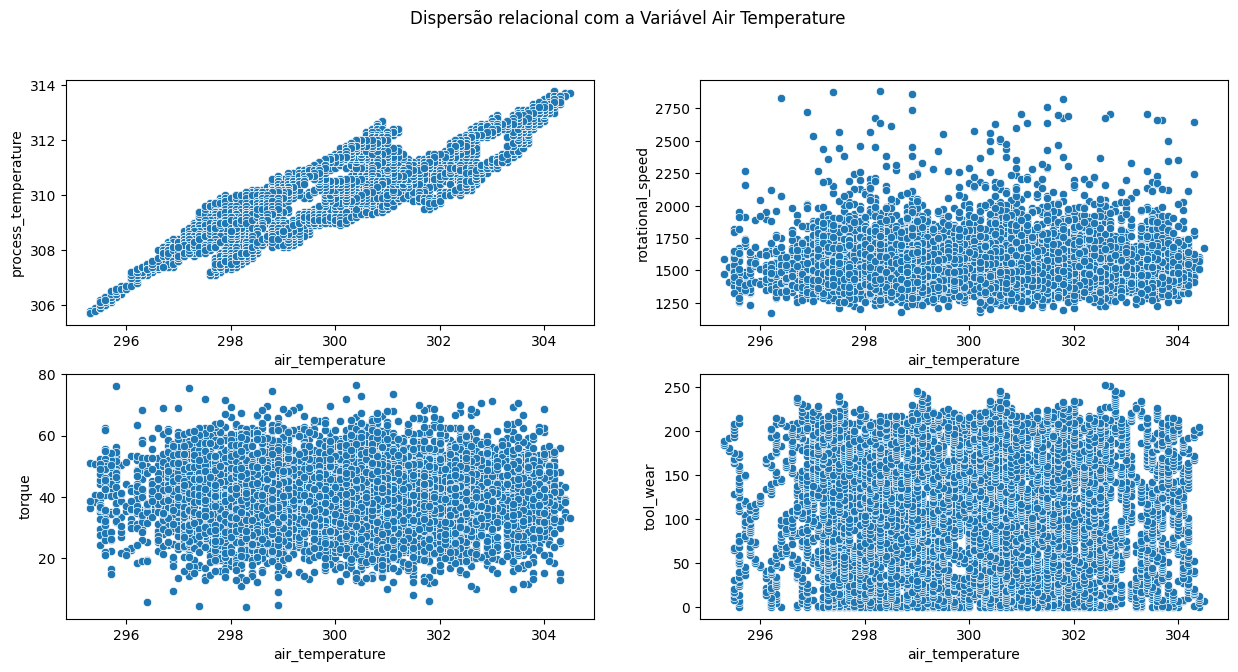

In [22]:
#Dispersão entre Variaveis dependentes com Air Temperature

fig, axes = plt.subplots(2, 2, figsize = (15, 7))
fig.suptitle('Dispersão relacional com a Variável Air Temperature')

sns.scatterplot(ax = axes[0,0], x = df['air_temperature'], y = df['process_temperature'])
sns.scatterplot(ax = axes[0,1], x = df['air_temperature'], y = df['rotational_speed'])
sns.scatterplot(ax = axes[1,0], x = df['air_temperature'], y = df['torque'])
sns.scatterplot(ax = axes[1,1], x = df['air_temperature'], y = df['tool_wear'])

<Axes: xlabel='process_temperature', ylabel='tool_wear'>

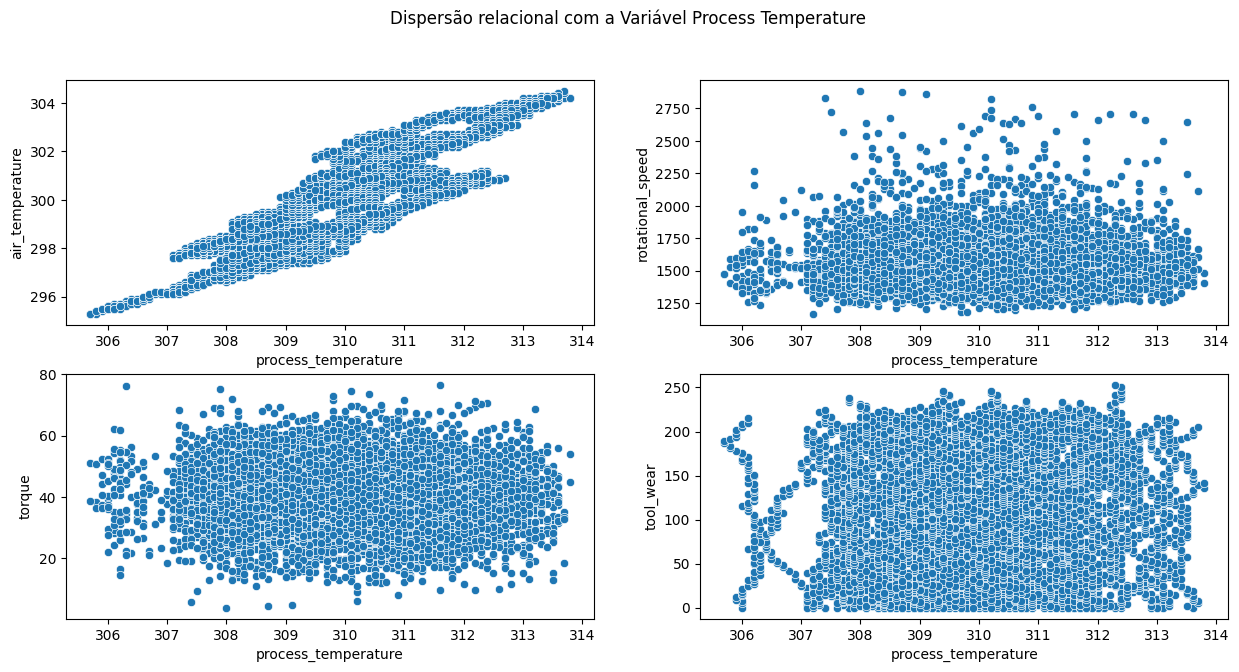

In [23]:
#Dispersão entre Variaveis dependentes com Process Temperature

fig, axes = plt.subplots(2, 2, figsize = (15, 7))
fig.suptitle('Dispersão relacional com a Variável Process Temperature')

sns.scatterplot(ax = axes[0,0], x = df['process_temperature'], y = df['air_temperature'])
sns.scatterplot(ax = axes[0,1], x = df['process_temperature'], y = df['rotational_speed'])
sns.scatterplot(ax = axes[1,0], x = df['process_temperature'], y = df['torque'])
sns.scatterplot(ax = axes[1,1], x = df['process_temperature'], y = df['tool_wear'])

<Axes: xlabel='rotational_speed', ylabel='tool_wear'>

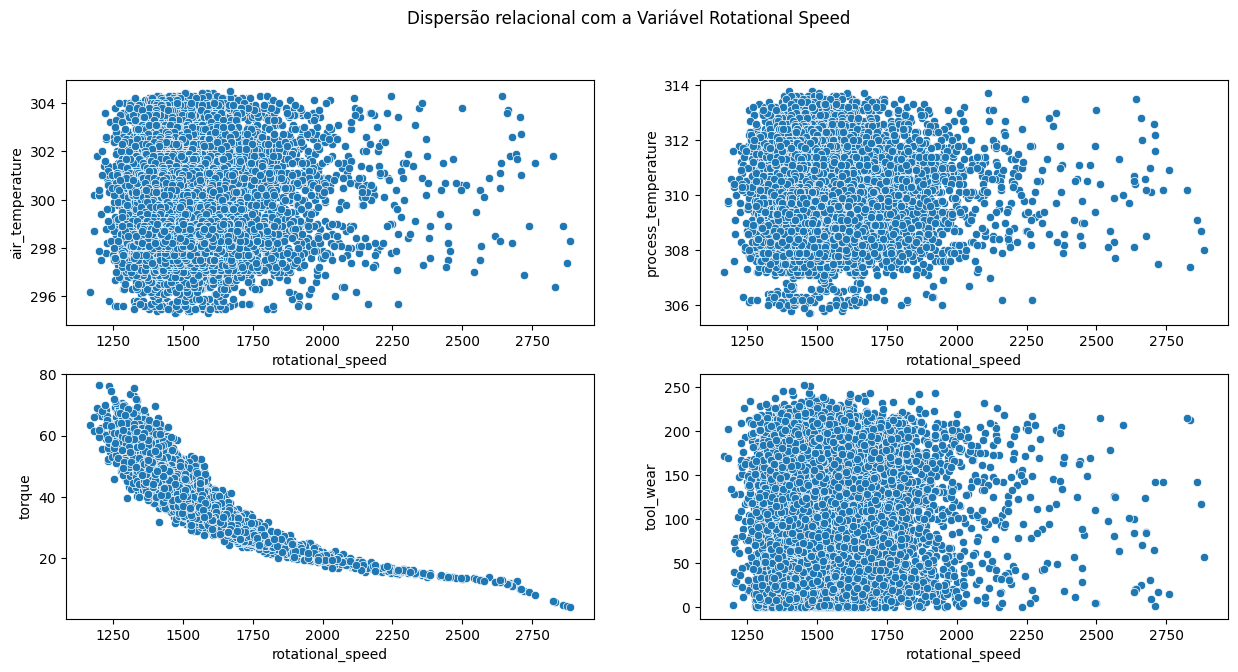

In [24]:
#Dispersão entre Variaveis dependentes com Rotational Speed

fig, axes = plt.subplots(2, 2, figsize = (15, 7))
fig.suptitle('Dispersão relacional com a Variável Rotational Speed')

sns.scatterplot(ax = axes[0,0], x = df['rotational_speed'], y = df['air_temperature'])
sns.scatterplot(ax = axes[0,1], x = df['rotational_speed'], y = df['process_temperature'])
sns.scatterplot(ax = axes[1,0], x = df['rotational_speed'], y = df['torque'])
sns.scatterplot(ax = axes[1,1], x = df['rotational_speed'], y = df['tool_wear'])

<Axes: xlabel='torque', ylabel='tool_wear'>

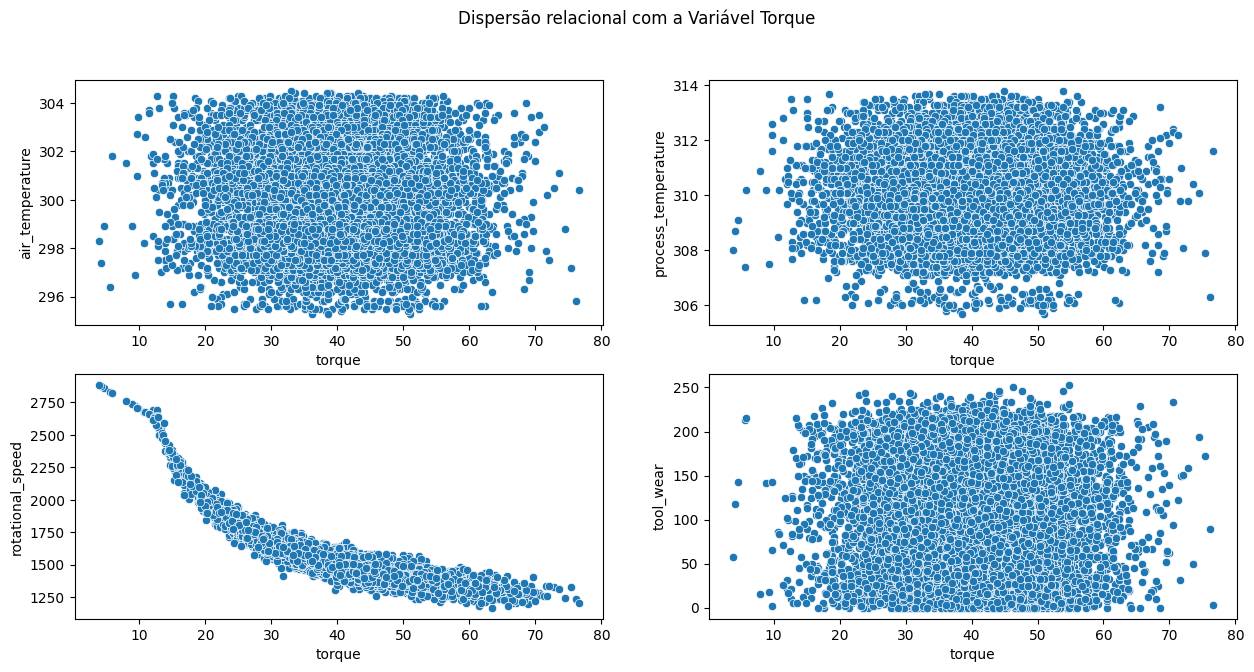

In [25]:
#Dispersão entre Variaveis dependentes com Torque

fig, axes = plt.subplots(2, 2, figsize = (15, 7))
fig.suptitle('Dispersão relacional com a Variável Torque')

sns.scatterplot(ax = axes[0,0], x = df['torque'], y = df['air_temperature'])
sns.scatterplot(ax = axes[0,1], x = df['torque'], y = df['process_temperature'])
sns.scatterplot(ax = axes[1,0], x = df['torque'], y = df['rotational_speed'])
sns.scatterplot(ax = axes[1,1], x = df['torque'], y = df['tool_wear'])

In [26]:
%store df

Stored 'df' (DataFrame)


In [27]:
pd.get_dummies(df['type_'])

,H,L,M
0,False,False,True
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
9995,False,False,True
9996,True,False,False
9997,False,False,True
9998,True,False,False
